<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Sentiment Analysis of Amazon Fine Food Reviews</h2> 
<br>


<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Problem Definition](#1)
   #### [2. Data Collection](#2)
   #### [3. Data Preparation](#3)
   #### [4. Model Training](#4)
   #### [5. Model Evaluation](#5)
   #### [6. Deployment](#6)

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">1. Problem Definition</h2>
<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">What is Sentiment Analysis ?</h2>

#### Sentiment analysis is the process of reading tons of product reviews automatically and extract useful and meaningful information to discover if the customers are really satisfied with your product or not.

#### A person’s feedback is more subjective rather than factual. Feedbacks can be negative, positive, or neutral. 

#### Sentiment analysis applies Natural Language Processing (NLP) and Text Analysis techniques to highlight the subjective information from the text. 

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Business understanding</h2>

<div class = 'image'> <img style="float:center; border:5px solid #fed049; width:70%;" align=center src = "https://static.wixstatic.com/media/e284c3_5c75ec753e434e6e84821790e552d0a2~mv2.jpg/v1/fill/w_740,h_351,al_c,q_90/e284c3_5c75ec753e434e6e84821790e552d0a2~mv2.webp"> 
</div>

<a href ="https://www.pyoneer.io/post/5-reasons-why-sentiment-analysis-is-important"
   style = "font-size:20px,color: dimgrey, text-align:center,font-family:serif">Image Source : pynoeer.io</a>
<br>

#### Performing the sentiment analysis on the customer reviews can help identify what is lacking and therefore guide you to improvement.
#### You can review customer feedback and responses, and thus identify the negative comments and reasons why the customers have issues with your product or service.

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Objective</h2>

#### Aim : To determine the sentiment of a given review. (Negative/ Neutral/ Positive)
---
#### ML Task : Supervised Learning Multi-Class Text Classification
---
#### Performance metrics : Accuracy, Confusion matrix
---


<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">2. Data collection</h2>

### Amazon Fine Food Reviews
#### Source : https://www.kaggle.com/snap/amazon-fine-food-reviews

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Description</h2>
<p style="font-size: 14px; background-color: lightgray; padding: 10px">
    This dataset consists of reviews of fine foods from amazon. <br>
    The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012.<br><br>
Reviews include product and user information, ratings, and a plain text review.
It also includes reviews from all other Amazon categories.<br><br>
   <b>Data includes :</b><br>
   - Reviews from Oct 1999 - Oct 2012<br>
   - 568,454 reviews<br>
   - 256,059 users<br>
   - 74,258 products<br><br>
<b> Attributes :</b><br>
   - <b>ProductId</b> : Unique identifier for the product<br>
   - <b>UserId</b> : Unqiue identifier for the user<br>
   - <b>ProfileName</b> : Name of customer<br>
   - <b>HelpfulnessNumerator</b> : Number of users who found the review helpful<br>
   - <b>HelpfulnessDenominator</b> : Number of users who indicated whether they found the review helpful or not<br>
   - <b>Score</b> : Rating between 1 and 5<br>
   - <b>Time</b> : Timestamp for the review<br>
   - <b>Summary</b> : Brief summary of the review<br>
   - <b>Text</b> : Review text
  
</p>

### Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , LSTM , Embedding
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import pickle

<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">3. Data Preparation</h2>

### Load data

In [23]:
data = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [24]:
data.shape

(568454, 10)

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Data cleaning</h2>

## Handling missing values

In [25]:
# Check null values
data.isna().sum().to_frame(name='# of missing values')

,# of missing values
Id,0
ProductId,0
UserId,0
ProfileName,16
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


### Remove rows which are having null values

In [26]:
total_rows =  data.shape[0]
data.dropna(how='any',inplace=True)
remaining_rows= data.shape[0]

removed_rows = total_rows-remaining_rows
print("No. of rows removed :", removed_rows)


No. of rows removed : 43


### Remove duplicate rows

In [27]:
a =  data.shape[0]
data.drop_duplicates(inplace=True, subset=['Score','Text'])
b = data.shape[0]

print("No. of rows removed :", a-b)


No. of rows removed : 174750


### Remove outliers

In [28]:
a =  data.shape[0]

idx = data[data["HelpfulnessNumerator"]>data["HelpfulnessDenominator"]].index
data.drop(index=idx, inplace=True)

b = data.shape[0]

print("No. of rows removed :", a-b)

No. of rows removed : 2


### Create target column using Score

In [29]:
## `Score` > 3 : "Positive" 
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):
    
    return "Positive" if x>3 else "Negative" if x<3 else "Neutral"

data.loc[:, 'target'] = data.Score.apply(create_target)

In [15]:
# target column 
data[['Score', 'target']].sample(5)

,Score,target
73418,1,Negative
16198,5,Positive
316776,5,Positive
69772,4,Positive
445098,5,Positive


<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Handling class imbalance</h2>

### Target distribution (Before)

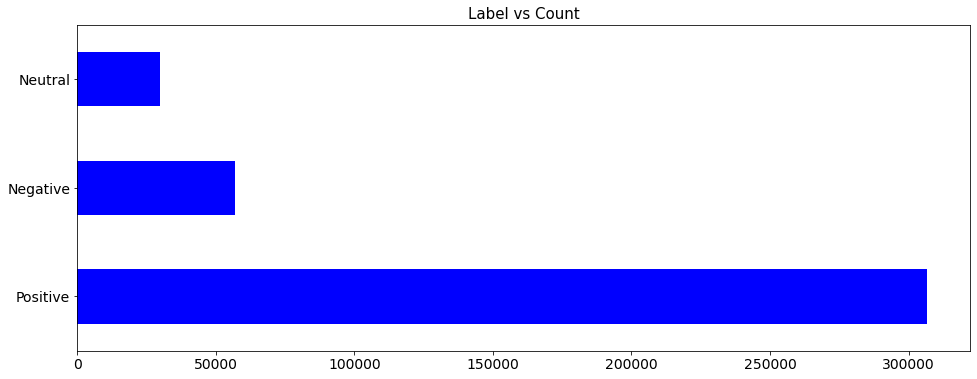

In [30]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

### Down sampling (remove some positive and negative reviews)

In [31]:
neutral = data.loc[data.target=="Neutral"] # 29770 reviews

positive = data.loc[data.target=="Positive"].sample(50000)

negative = data.loc[data.target=="Negative"].sample(50000)

data = pd.concat([positive, negative, neutral])
data.shape

(129770, 11)

### Target distribution (after)

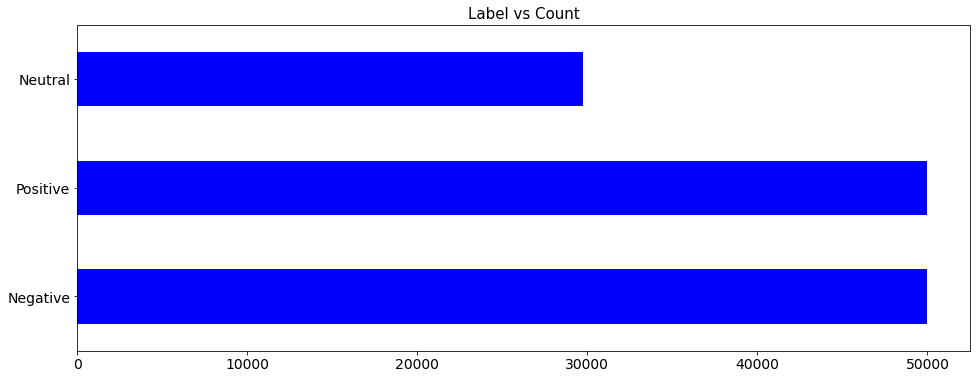

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Pre-processing</h2>

### Stop words

In [34]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'in', 'such', 'both', 'isn', 'to', 'don', 'will', 'but', 'here', 'ma', 'what', 'o', 'she', 'itself', 'am', 'off', 'haven', 'you', 'myself', "you're", 'me', 'the', 'other', 'mustn', 'while', 'yourselves', 'yourself', 'y', 'down', 'mightn', 'themselves', 'over', 'were', 'too', 'my', 'up', 'couldn', 'ours', 'theirs', 'few', 'is', 'just', 'should', 'aren', 'after', 'then', "you'll", 'was', 'there', 'further', 'are', 'll', 'one', 'again', 'herself', "it's", 've', "that'll", 'he', 'most', 'which', 'they', 'only', 'hasn', 'about', 'any', 'who', 'wasn', 'himself', 'if', 'until', 'having', 'by', 'these', 'needn', 'through', 'so', 'its', 'his', 'whom', 'have', 'more', 'once', 'from', 's', 'when', 'how', 'm', "should've", 'wouldn', 'with', 'had', 'an', 'be', 'your', 'hers', 'that', 'some', 'shouldn', 'has', 'being', 'and', 'on', 'do', 'why', 'below', 'our', 'won', 'into', "you've", 'does', 'before', 'ourselves', 'i', 'a', "she's", 'their', 'under', 'been', 'ain', 'can', 'of', 'as', 'same', 'out'

### Remove unwanted words from reviews
#### Ex. html tags, punctuation, stop words, etc..

In [35]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [36]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [37]:
print("Before preprocessing : ")
data.Text.iloc[6]

Before preprocessing : 


"This tea has a nice taste and is pretty comparable to the Foojoy Oolong, which is what I've purchased in the past. However, one thing that should be noted is that the tea is caffeine free - or at least that is what the individual tea bag wrappers state. The product details on Amazon's site do not list this, nor does the box that the tea is packaged in."

In [39]:
# apply preprocessing function

data.Text = data.Text.apply(preprocessor) 
print("After preprocessing : ")
data.Text.iloc[6]

After preprocessing : 


'tea nice tast pretti compar foojoy oolong ive purcha past howev thing note tea caffein free least individu tea bag wrapper state product detail amazon site not list nor box tea packag'

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Word clouds</h2>

In [40]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

### Word cloud for Positive reviews

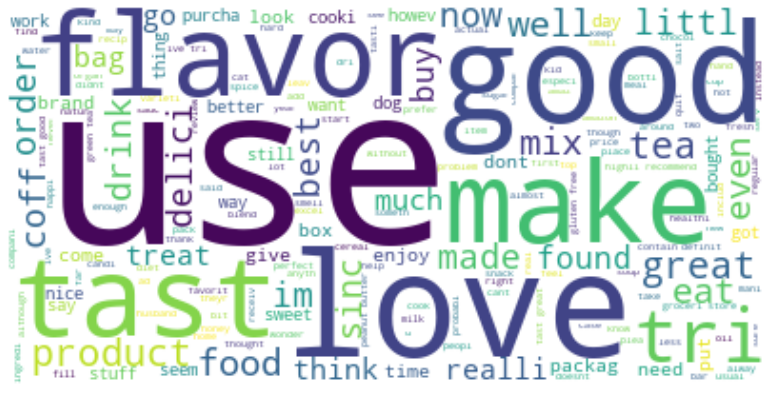

In [41]:
pos = data.loc[data.target=="Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

### Word cloud for Negative reviews

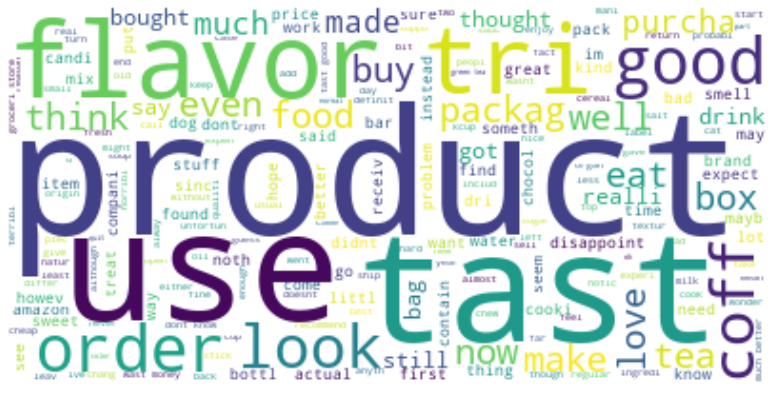

In [42]:
pos = data.loc[data.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

### Word cloud for Neutral reviews

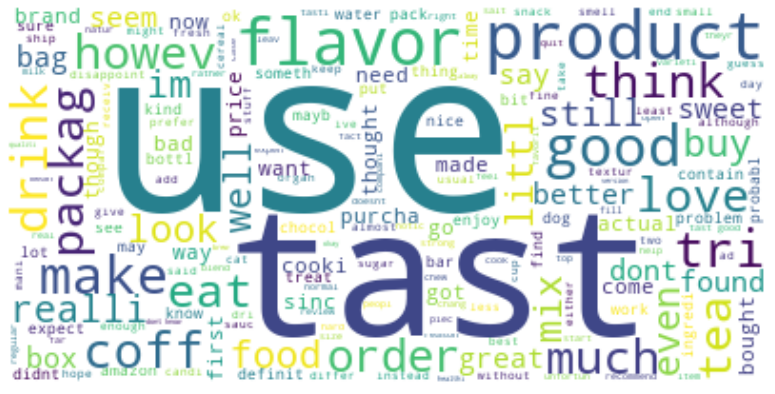

In [43]:
pos = data.loc[data.target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Train Test Split</h2>

#### Train set : 70% of data
#### Test set : 30% of data

In [44]:
X = data.Text
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1, stratify=y)

In [45]:
X_train.shape, X_test.shape

((103816,), (25954,))

<h2 style = "font-size:25px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Vectorization</h2>

### Bag of Words Vectorizer

In [46]:
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

### TF-IDF Vectorizer

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

###  Label Encoding

In [48]:
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">4. Model Training</h2>

In [49]:
### 
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

## Logistic Regression with BoW

In [50]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.7002099868998998
Test accuracy score : 0.6904523387531787

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.7374874778454188
Test accuracy score : 0.7145719349618556

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7656141635200739
Test accuracy score : 0.7149187023194883

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7870752099869
Test accuracy score : 0.7043230330584881

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.793124373892271
Test accuracy score : 0.6940741311551206

 ----------------------------------------


## Naive Bayes Classifier with BoW

In [51]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.7101891808584418
Test accuracy score : 0.6799337289049857

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7092933651845573
Test accuracy score : 0.6815905062803421

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7089658626801264
Test accuracy score : 0.6818987439315712

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7086190953224937
Test accuracy score : 0.6820143330507822

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7085227710564845
Test accuracy score : 0.6817060953995531

 ----------------------------------------


## Logistic Regression with Tf-Idf

In [52]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6453629498343223
Test accuracy score : 0.6408646066116976

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6797410803729675
Test accuracy score : 0.6728442629267165

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7319199352700932
Test accuracy score : 0.7134160437697464

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7638995915851121
Test accuracy score : 0.719734915619943

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.7863335131386299
Test accuracy score : 0.7085613007628881

 ----------------------------------------


## Naive Bayes classifier with Tf-Idf

In [53]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.7163924635894274
Test accuracy score : 0.6794713724281422

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7148609077598829
Test accuracy score : 0.6830546351236804

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7122312552978346
Test accuracy score : 0.6842490560221931

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7109212452801109
Test accuracy score : 0.6839022886645604

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7100350620328273
Test accuracy score : 0.6832087539492949

 ----------------------------------------


<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">5. Model Evaluation</h2>

In [54]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    return plt.show()

### Best model : Logistic Regression(C=1) with TfIdf data

In [55]:
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [56]:
# predictions
y_preds_train = bmodel.predict(tfidf_X_train)
y_preds_test = bmodel.predict(tfidf_X_test)

### Accuracy

In [57]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.7638995915851121
Test accuracy score : 0.719734915619943


### Confusion Matrix

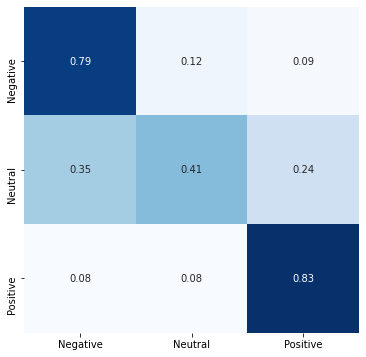

In [58]:
plot_cm(y_test, y_preds_test)

### Observations

#### - Our model is performing better on classifying positive and negative reviews.
#### - Need improvement in classifying the neutral reviews (Any suggestions??)

<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">6. Deployment</h2>

### Save model and transformer

In [59]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

### Prediction on single review

In [60]:
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [61]:
# positve review
review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [63]:
# negative review
review = "This product is a waste of money. Don't buy this!!"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!
